In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import  make_scorer
from imblearn.under_sampling import RandomUnderSampler

**Motivation**

This dataset and the subsequent analysis is a chance for us to use collected user data to understand and predict their behavior. There is an intense interest from businesses to understand their clientele. This allows them to make more accurate projections as well as target certain subsets. In this example, IBM could target users that our algorithms predicted as churn= true with special offers to get them to stay. This context is important as we use our algorithms and analyze their performance. This type of data analysis is extremely important in the private sector and a great skill to have on a data scientist's resume!


In [7]:
#Reading in our dataset to a pandas dataframe, dropping unimportant and non-numeric fields
#df = pd.read_csv('/Users/ericrobinson/Downloads/archive-2/churn-bigml-80.csv')
df = pd.read_csv('churn-bigml-80.csv')
df=df.drop(['State' ,'International plan','Voice mail plan'], axis=1)
df


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


**Understanding the Class Imbalance**


In [8]:
#looping through all churn values,counting the "True"'
count=0
for i in df.loc[:,"Churn"]:
    if(i):
        count +=1
print(count)
#percentage of Dataset where churn = False
print(100-(count/2666)*100)

388
85.4463615903976


This is good news for the company that of their customer dataset, only 14% of their customers are leaving. For us however we need to be aware there is a large imbalance inbetween the classes. If we simply predict that no customers will be leaving, then we will still have a 85.4% accuacy score!

**Initial KNN Training**

We are using the K Nearest Neighbors algorithm. This is a straightforward algorithm which deals well with generating non linear boundaries between classes (binary in our case). The algorithm works by reading in the training data, then when given a test point it finds the k-closest training points in the feature space (euclidean distance in our case), then assigning the majority label of those to the test point. More can be found here: https://scikit-learn.org/stable/modules/neighbors.html


Here I am splitting the dataset into a test and training split. We will train the KNN on 80% of our data, then test it on the remaining 20%. Before training our KNN, we should first scale our data. This should "Standardize features by removing the mean and scaling to unit variance" (Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011). This improves the algorithm as many of our properties we are using to model with have different scales, by standardizing them we can negate the effect of their scaling. This has been shown particularly to improve distance based algorithms such as KNN.

You can read more about the methods of scaling here:
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/


In [9]:
#What a basic KNN training looks like
X = df.drop('Churn', axis=1)
y = df['Churn']

#Splitting into 80-20 test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8820224719101124


Ok we got an accuracy of 88.2%! That sounds great! Except we need to remember our class imbalance, if we guesed no for everything we would have an accuracy of 85.4%. On the bright side, we did do slightly better than our "All No" prediction. Remember, the goal of this is not just to get a good accuracy, but to predict Churn well, and we care more about predicting TRUE churn values(the minority class). So instead of using accuracy, we will use the F1 score which is 2 * (precision * recall) / (precision + recall), recall and precision are both metrics which are less biased by class imbalances. We also used the "macro" modification which reinforces the importance of the minority class. You can see below in hyperparameter tuning that the performance will drop as the vanilla KNN struggles with the minority class. More can be read here https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html



**Hyperparameter Tuning**

Hyperparameter tuning is another way to improve the performance of a model. It involves tweaking parameters of the algorithm to find the best combination. For KNN, the main parameter we will be shifting is the k value, or the neighborhood size that each point will be compared against to determine its predicted class. It's important that we don't tune our parameter on our final testing data because we are overfitting our data by using feedback from testing data. Instead we will hold out 20% of the data for a final test, and use k fold cross validation on the remaining 80%. In the code below we are charting out the 5 fold cross validaiton f1 score performance of the. "vanilla" KNN algorithm.

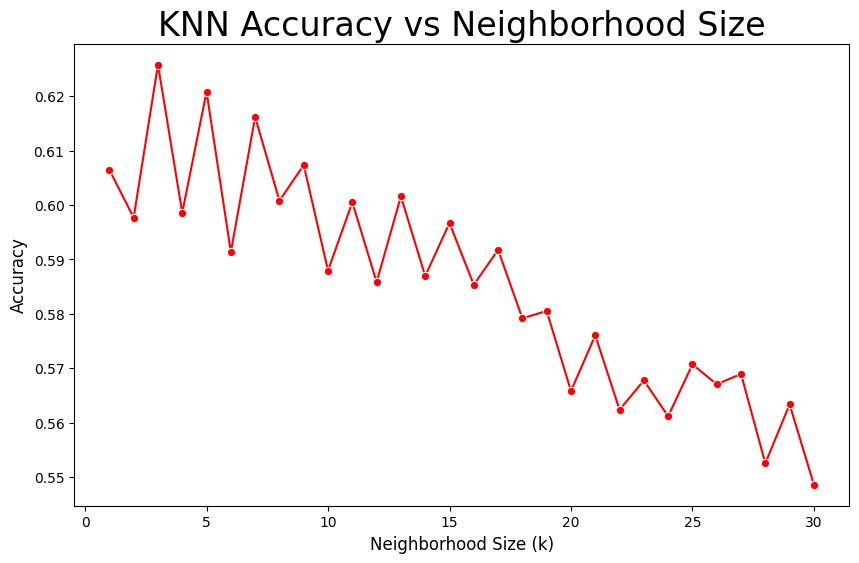

In [11]:
#K value of up to 30 to see performance (above 30 is never the best)
k_values = [i for i in range (1,31)]
PCA_Scores = []
#iterate through each k value, perform 5 fold cross validation, append to a list of scores so we can graph
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y,scoring=make_scorer(f1_score, average='macro'), cv=5)
    PCA_Scores.append(np.mean(score))
plt.figure(figsize=(10,6))

graph=sns.lineplot(x = k_values, y = PCA_Scores, marker = 'o', color ='red')
plt.xlabel( "Neighborhood Size (k)" , size = 12 )
# Set label for y-axis
plt.ylabel( "Accuracy" , size = 12 )
# Set title for figure
plt.title( "KNN Accuracy vs Neighborhood Size" , size = 24 )
graph
plt.savefig('vanillaKNN.jpeg')


We can see with this implementation, we would choose a neighborhood size of 3 as it performs the best.

**Undersampling and Oversampling**

We've already discussed our clear class imbalance, but so far we have not addressed it. Now, we see what can be done to improve our model in terms of the imbalance. The best ways to improve KNN on imbalanced data is by under and over sampling (Zhan Shi 2020 IOP Conf. Ser.: Mater. Sci. Eng. 719 012072). When selecting our data for training, the idea is to over represent the minority class (churn=True) and/or under represent the majority class (churn=False). This way our algorithm is hopefully less biased towards the majority class and performs better with the minority class which is our main goal and performance metric. We have used several different methods to test this. 

   The first oversampling technique is Synthetic Minority Oversampling Technique or SMOTE which generates NEW minority class examples to train on through interpolation. Essentially a minority class point is selected and so is a nearby minority class point, a new example is created as a point on the line between the two points in the feature space. More can be read about SMOTE here: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/). 
   
   The next method is Adaptive Synthetic or ASYN, which also generates NEW minority points, but this time the points are generated according to the class imbalance where points which are hard to classify, EX: few neighbors, are generated more points rather than a cluster of minority points. More can be read about ADSYN here: "AdaptiveSynthetic Sampling Approach for Imbalanced Learning" by He et.al : https://sci2s.ugr.es/keel/pdf/algorithm/congreso/2008-He-ieee.pdf
   
   Next we have Random oversampling which is a more naieve approach and samples WITHOUT replacement from the minority class, essentially allowing for duplication of minority class points and overall more points selected for training. Unlike the other examples, this does NOT generate new examples. Similarly we have Random undersampling which is a straightforward approach which excludes training points from the majority class at random until we have a designated class balance. This targets the majority class and does not create any new points but still rebalances the data. More can be read about these two approaches here: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/#:~:text=Random%20oversampling%20involves%20randomly%20selecting,them%20from%20the%20training%20dataset.
   

<Axes: title={'center': 'KNN F1 Score vs Neighborhood Size'}, xlabel='Neighborhood Size (k)', ylabel='F1 Score'>

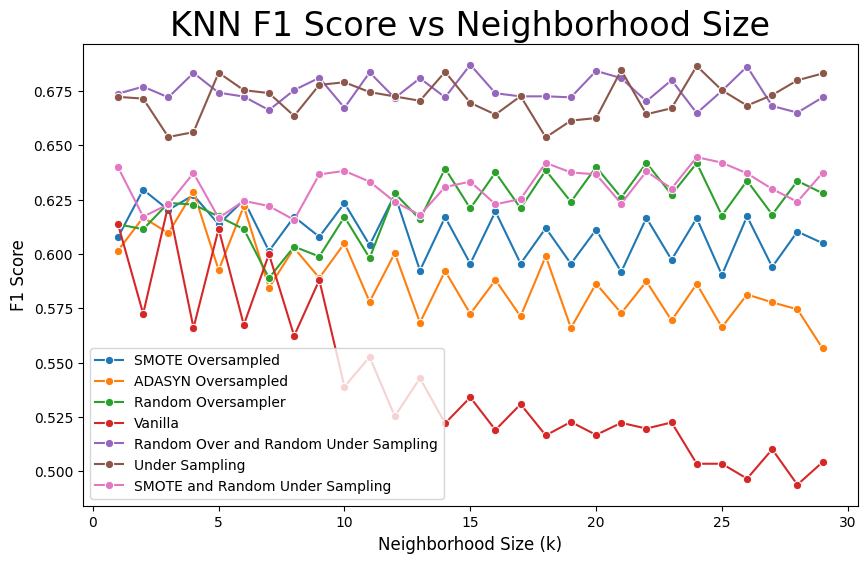

In [12]:
X = df.drop('Churn', axis=1)
y = df['Churn']
#Spliting our data so we don't overfit! Only performing our cross validation on the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Over_scores = []
kf = KFold(n_splits=5, random_state=42, shuffle=True)

plt.figure(figsize=(10,6))
plt.xlabel( "Neighborhood Size (k)" , size = 12 )
plt.ylabel( "F1 Score" , size = 12 )
plt.title( "KNN F1 Score vs Neighborhood Size" , size = 24 )

#iterate through each k value, perform 5 fold cross validation, append to a list of scores so we can graph

for k in range(1,30):
    #Pipeline is a way to linearly apply our various steps. This says to first perform SMOTE on the data
    #then train a KNN classifier on data given
    imba_pipeline = make_pipeline(SMOTE(), 
                                   KNeighborsClassifier(n_neighbors=k))
    #important, using X train, using none of the test data, manually importing our f1 score instead of accuracy metric
    score= cross_val_score(imba_pipeline, X_train, y_train, scoring=make_scorer(f1_score, average='macro'),cv=kf)
    #average f1 score of the 5 folds is used for each k value
    Over_scores.append(np.mean(score))

sns.lineplot(x = (range(1,30)), y = Over_scores, marker = 'o', label='SMOTE Oversampled')


#iterate through each k value, perform 5 fold cross validation, append to a list of scores so we can graph
#identical as first example except with different sampling methods
adasynscores=[]
for k in range(1,30):
    imba_pipeline = make_pipeline(ADASYN(), 
                                   KNeighborsClassifier(n_neighbors=k))
    score= cross_val_score(imba_pipeline, X_train, y_train, scoring=make_scorer(f1_score, average='macro'),cv=kf)
    adasynscores.append(np.mean(score))

sns.lineplot(x = (range(1,30)), y = adasynscores, marker = 'o', label='ADASYN Oversampled')


#iterate through each k value, perform 5 fold cross validation, append to a list of scores so we can graph

randscores=[]
for k in range(1,30):
    imba_pipeline = make_pipeline(RandomOverSampler(random_state=42), 
                                   KNeighborsClassifier(n_neighbors=k))
    score= cross_val_score(imba_pipeline, X_train, y_train, scoring=make_scorer(f1_score, average='macro'),cv=kf)
    randscores.append(np.mean(score))

sns.lineplot(x = (range(1,30)), y = randscores, marker = 'o', label='Random Oversampler')




scores=[]
#iterate through each k value, perform 5 fold cross validation, append to a list of scores so we can graph
#identical as first example except with different sampling methods

for k in range(1,30):
    imba_pipeline = make_pipeline(
                                   KNeighborsClassifier(n_neighbors=k))
    score= cross_val_score(imba_pipeline, X_train, y_train, scoring=make_scorer(f1_score, average='macro'), cv=kf)
    scores.append(np.mean(score))
sns.lineplot(x = (range(1,30)), y = scores, marker = 'o',label='Vanilla')



over =RandomOverSampler(random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5)
m=  KNeighborsClassifier(n_neighbors=k)
#iterate through each k value, perform 5 fold cross validation, append to a list of scores so we can graph
#identical as first example except with different sampling methods, pipeline is used diferently but still
#follows the same steps, under sample, then oversample, then classify

pipeline = Pipeline(steps=[ ('u', under),('o', over), ('m', m)])
OverUnderscores=[]
for k in range(1,30):
    score= cross_val_score(pipeline, X_train, y_train, scoring=make_scorer(f1_score, average='macro'), cv=kf)
    OverUnderscores.append(np.mean(score))
sns.lineplot(x = (range(1,30)), y = OverUnderscores, marker = 'o',label='Random Over and Random Under Sampling')


under = RandomUnderSampler(sampling_strategy=0.5)
m=  KNeighborsClassifier(n_neighbors=k)
# define pipeline
pipeline = Pipeline(steps=[ ('o', under), ('m', m)])
Underscores=[]
for k in range(1,30):
    score= cross_val_score(pipeline, X_train, y_train, scoring=make_scorer(f1_score, average='macro'), cv=kf)
    Underscores.append(np.mean(score))
sns.lineplot(x = (range(1,30)), y = Underscores, marker = 'o',label='Under Sampling')



over =SMOTE()
under = RandomUnderSampler(sampling_strategy=0.5)
m=  KNeighborsClassifier(n_neighbors=k)
# define pipeline
pipeline = Pipeline(steps=[ ('u', under),('o', over), ('m', m)])
SMOTEUnderscores=[]
for k in range(1,30):
    score= cross_val_score(pipeline, X_train, y_train, scoring=make_scorer(f1_score, average='macro'), cv=kf)
    SMOTEUnderscores.append(np.mean(score))
sns.lineplot(x = (range(1,30)), y = SMOTEUnderscores, marker = 'o',label='SMOTE and Random Under Sampling')



Here we can see how all the different algorithms perform. The best three are Undersampling, random undersampling comined with random oversampling, and random oversampling. These results do match the results from the research paper with those two receiving the highest performance. 


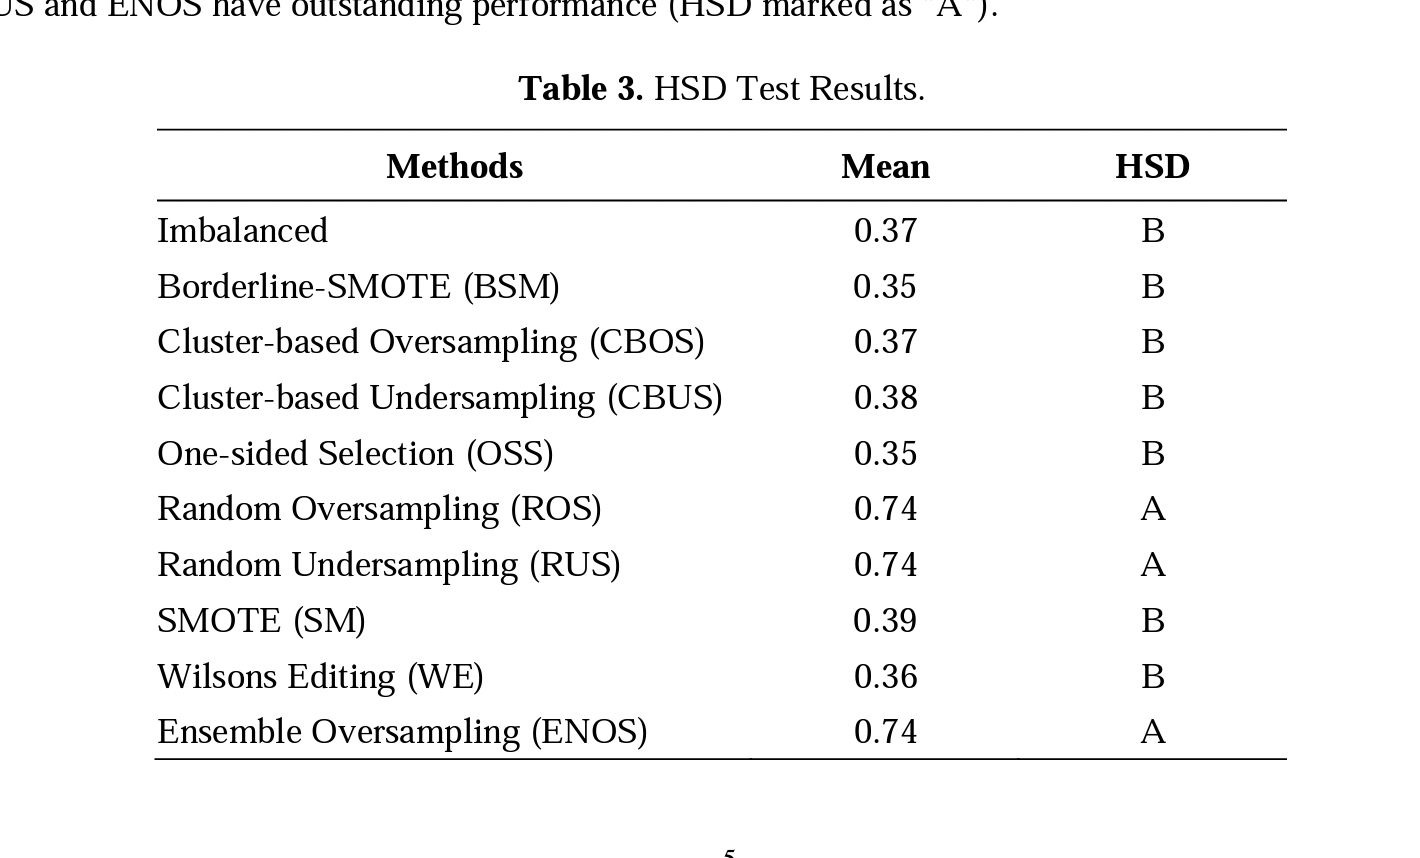

 Zhan Shi 2020 IOP Conf. Ser.: Mater. Sci. Eng. 719 012072

<Axes: title={'center': 'KNN Accuracy vs Neighborhood Size'}, xlabel='Neighborhood Size (k)', ylabel='Accuracy'>

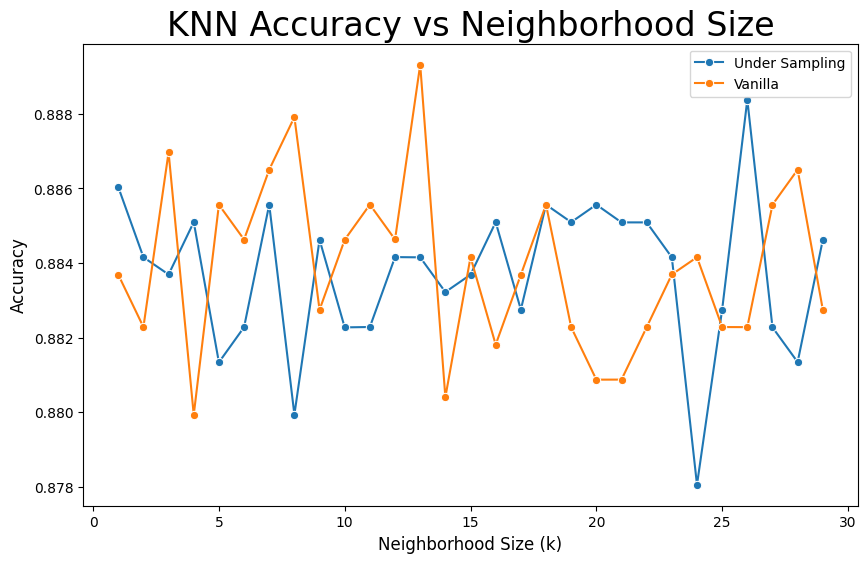

In [13]:
#Same code as before, now just using the original accuracy metric
under = RandomUnderSampler(sampling_strategy=0.5)
m=  KNeighborsClassifier(n_neighbors=k)
# define pipeline
pipeline = Pipeline(steps=[ ('o', under), ('m', m)])
Underscores=[]
plt.figure(figsize=(10,6))
plt.xlabel( "Neighborhood Size (k)" , size = 12 )
# Set label for y-axis
plt.ylabel( "Accuracy" , size = 12 )
# Set title for figure
plt.title( "KNN Accuracy vs Neighborhood Size" , size = 24 )
for k in range(1,30):
    #no custom score code so overall accuracy is used by default
    score= cross_val_score(pipeline, X_train, y_train, cv=kf)
    Underscores.append(np.mean(score))
sns.lineplot(x = (range(1,30)), y = Underscores, marker = 'o',label='Under Sampling')


scores = []
for k in range(1,30):
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    imba_pipeline = make_pipeline(KNeighborsClassifier(n_neighbors=k))
    score= cross_val_score(pipeline, X_train, y_train, cv=kf)
    scores.append(np.mean(score))
sns.lineplot(x = (range(1,30)), y = scores, marker = 'o',label='Vanilla')


Funny enough, if we bring it back to our original vanilla KNN compard with the undersampled modification using the original accuracy score, we find they appear to be performing identically. This is why it is important to examine the context of your data science problem. We care more about predicting churn and would rather overestimate churn than be blind sided by it. Through this KNN tutorial we have seen how to properly examine the dataset, choose appropriate parameters, and deal with class imbalances. 

In [14]:
#same as before without cross validation, using the pipeline (undersample then classify) to train then predict
under = RandomUnderSampler(sampling_strategy=0.5)
m=  KNeighborsClassifier(n_neighbors=19)
# define pipeline
pipe = Pipeline(steps=[ ('u', under), ('m', m)])
pipe.fit(X_train, y_train)
print('Accuracy', pipe.score(X_test, y_test))

Accuracy 0.8913857677902621


Not bad! (and remember it does a better job of predicting customers leaving)

#### Decision Tree Classification

Next we used the another simple classification algorithm called Decision Tree. Decision trees are built from nodes that split a subset of the data on a certain feature to minimize entropy of the label among the two subsets. In this section we are using the sklearn impelementation of the decision tree. More information on this algorithm can be found at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 

We will use the same training and test split that we used to train and test our KNN Classifier.



**Hyperparamter Tuning**

The decision tree hyperparameter is height. The taller the tree, the more splitting nodes are allowed. We will shift our tree height from 2 to 16 (the number of parameters), train them on the training data, test them with our test set, and then plot accuracy and f1 score against height. This will help us understand the optimal height that leads to a tree that does not underfit or overfit the data.

In [15]:
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('churn-bigml-80.csv')
df=df.drop(['State' ,'International plan','Voice mail plan'], axis=1)
df['Churn'] = df['Churn'].map(lambda e : "Yes" if e else "No")

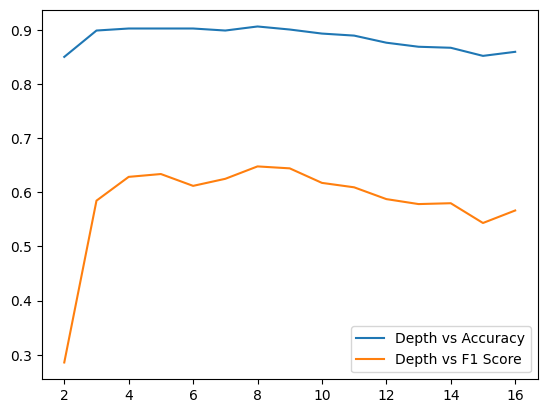

In [16]:
# Create training and test sets splitting 80 20 as before
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Track accuracy and f1 score in accs and f1s respectively so that we can compare different height trees later
depths = [0] * 15
accs = [0] * 15
f1s = [0] * 15

# Train trees of every height between 2 and 16 inclusive
for i in range(2, 17):
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(X_train, y_train)
    # see predicted values from test data
    predicted = dt.predict(X_test)
    # store the accuracy score of this tree
    acc = dt.score(X_test, y_test)
    # store the f1 score of this tree
    f1 = f1_score(y_test, predicted, average = 'binary', pos_label= "Yes")
    depths[i - 2] = i
    accs[i -2] = acc
    f1s[i - 2] = f1

# Use accumulated data on accuracy and f1 score to plot lines of the two metrics over tree depth
plt.plot(depths, accs, label = "Depth vs Accuracy")
plt.plot(depths, f1s, label = "Depth vs F1 Score")
plt.legend()
plt.show()

Above we see are accuracy and f1 score both plotted against the dpeth of the tree. We can see in both lines that the peak is between heights 5 and 7. The data underfits when the height is lower than this interval, meaning that due to less splitting nodes, the algorithm did not analyze enough data in the training set to make good predictions. The data overfits when the height is greater, meaning that the algorithm was allowed to have too many splittting node, thereby matching the training data too closely. As a result it was not generalizable to the test data which is why accuracy and f1 score decrease.

More important however is the massive discrepency between accuracy and f1 score. Based on our investigation of the dataset and the KNN algorithm it would have been reasonable to assume this would happen and skip straight to sampling methods however it was important to show that the decision tree is also weak to class imbalance. Accuracy does peak above 0.90 so clearly the algorithm is doing more than just guessing no churn which would result in an accuracy of 85% however in regard to precision and recall (how well the algorithm is doing at predicting churn, the minority class) it is doing abysmally. To remedy this we will employ several of the sampling methods used above and rechart our f1 score for the decisions trees built with each new sample.


**Sampling**

Below we are using random undersampling, SMOTE, ADASYN, and random oversampling to create new datasets. For each of these we will train the same number of decision trees over the same range of heights. We will track f1 score for each of these and we will plot a line of f1 scores over depth for each sampling.

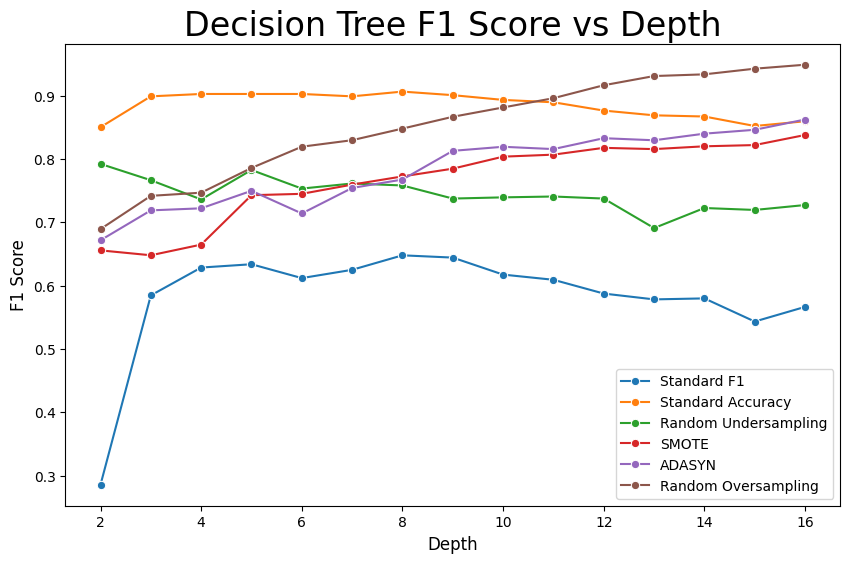

In [17]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Create a figure to compare f1 scores vs depth. We will create a line for each sampling method
plt.figure(figsize=(10,6))
plt.xlabel( "Depth" , size = 12 )
plt.ylabel( "F1 Score" , size = 12 )
plt.title( "Decision Tree F1 Score vs Depth" , size = 24 )

# Plot the f1 and accuracy for the tree trained on the original data set
sns.lineplot(x = (range(2,17)), y = f1s, marker = 'o',label='Standard F1')
sns.lineplot(x = (range(2,17)), y = accs, marker = 'o',label='Standard Accuracy')

# Perform random undersampling on the data
X = df.drop('Churn', axis=1)
y = df['Churn']
under = RandomUnderSampler(sampling_strategy=1.0)
steps = [('o', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train trees and plot line with current sampling technique
depths = [0] * 15
f1s = [0] * 15
for i in range(2, 17):
    for i in range(2, 17):
        dt = DecisionTreeClassifier(max_depth = i)
        dt.fit(X_train, y_train)
        predicted = dt.predict(X_test)
        acc = dt.score(X_test, y_test)
        f1 = f1_score(y_test, predicted, average = 'binary', pos_label= "Yes")
        depths[i - 2] = i
        f1s[i - 2] = f1 
sns.lineplot(x = (range(2,17)), y = f1s, marker = 'o',label='Random Undersampling')

# Use SMOTE on the dataset
X = df.drop('Churn', axis=1)
y = df['Churn']
over = SMOTE(sampling_strategy = 1.0)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train trees and plot line with current sampling technique
depths = [0] * 15
f1s = [0] * 15
for i in range(2, 17):
    for i in range(2, 17):
        dt = DecisionTreeClassifier(max_depth = i)
        dt.fit(X_train, y_train)
        predicted = dt.predict(X_test)
        acc = dt.score(X_test, y_test)
        f1 = f1_score(y_test, predicted, average = 'binary', pos_label= "Yes")
        depths[i - 2] = i
        f1s[i - 2] = f1   
sns.lineplot(x = (range(2,17)), y = f1s, marker = 'o',label='SMOTE')

# Use ADASYN on the dataset
X = df.drop('Churn', axis=1)
y = df['Churn']
over = ADASYN(sampling_strategy = 1.0)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train trees and plot line with current sampling technique
depths = [0] * 15
f1s = [0] * 15
for i in range(2, 17):
    for i in range(2, 17):
        dt = DecisionTreeClassifier(max_depth = i)
        dt.fit(X_train, y_train)
        predicted = dt.predict(X_test)
        acc = dt.score(X_test, y_test)
        f1 = f1_score(y_test, predicted, average = 'binary', pos_label= "Yes")
        depths[i - 2] = i
        f1s[i - 2] = f1    
sns.lineplot(x = (range(2,17)), y = f1s, marker = 'o',label='ADASYN')

# Preform random oversampling on the dataset
X = df.drop('Churn', axis=1)
y = df['Churn']
over = RandomOverSampler(sampling_strategy=1.0)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train trees and plot line with current sampling technique
depths = [0] * 15
f1s = [0] * 15
for i in range(2, 17):
    for i in range(2, 17):
        dt = DecisionTreeClassifier(max_depth = i)
        dt.fit(X_train, y_train)
        predicted = dt.predict(X_test)
        acc = dt.score(X_test, y_test)
        f1 = f1_score(y_test, predicted, average = 'binary', pos_label= "Yes")
        depths[i - 2] = i
        f1s[i - 2] = f1    
sns.lineplot(x = (range(2,17)), y = f1s, marker = 'o',label='Random Oversampling')

plt.show()

As we saw when we tried different sampling methods in KNN, random oversampling performed the best. The gains to f1 score start to flatten off after height 12. At this point we are increasing the complexity of the tree for very little gain. This could lead to less generizability so we can conclude that a tree of height twelve trained of the randomly oversampled dataset is the best. 

**Feature Importance**

An advantage of the decision tree is that we can see how features interact with the result. Now we will take the decision tree of height twelve trained on the randomly oversampled dataset to see which features are most important. This is useful because if a company knows which stats about their customers are most closely associated with churn, they can make policy changes to regarding these options to better retain customers.

In [18]:
# Get a decision tree of depth 12
dt = DecisionTreeClassifier(max_depth = 12)
dt.fit(X_train, y_train)
# Create a dataframe to display feature importance with the name in the feature column and its importance in the other column
features = pd.DataFrame(columns=["Feature", "Importance"])
featurenames = []
for col in df.columns:
    featurenames.append(col)
features["Feature"] = featurenames[:16]
features["Importance"] = dt.feature_importances_
features = features.sort_values(by = "Importance", ascending=False)
features

,Feature,Importance
15,Customer service calls,0.188051
3,Total day minutes,0.163290
8,Total eve charge,0.082778
5,Total day charge,0.067223
0,Account length,0.063304
12,Total intl minutes,0.056497
13,Total intl calls,0.055247
2,Number vmail messages,0.053994
7,Total eve calls,0.046552
10,Total night calls,0.044443


As we can see, one of the most important feature is customer service calls. This makes sense intuitively. A customers relationship to customer service has a dramtic impact on the customers perception of the company. An experience with customer service that generates a strong emotional reaction could greatly affect whether a customer stays with a company or not.

#### Random Forest Classifier

An evolution of the decision tree classifier is the Random Forest Classifier. This algorithm trains many decision trees at once to help it classify examples. This classifier can be more accurate and sometimes handle class imbalance better but this comes at the cost of computation time. Our decision tree is performing well but it doesn't hurt to compare it to the Random Forest Classifier. Like the decision tree, this algorithm also has a height hyperparameter that we will tune and compare the results of. Furthermore, we will initially train the classifiers on the randomly oversampled data, since this gave the best results with the decision tree, but then we will train it on the original dataset just for comparison.

In [19]:
from sklearn.ensemble import RandomForestClassifier

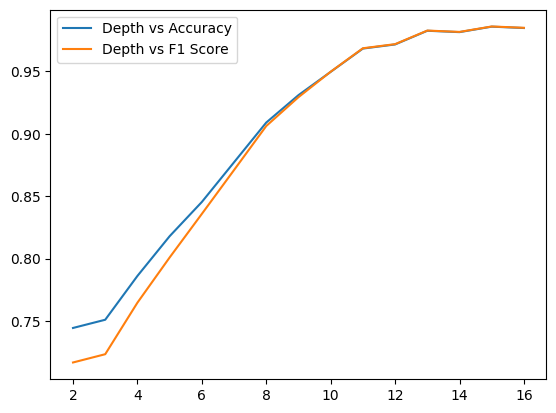

In [20]:
# Again we will track depth, accuracy, and f1 score for all our random forest classifiers
depths = [0] * 15
accs = [0] * 15
f1s = [0] * 15

# Train forests of every height between 2 and 16 inclusive
for i in range(2, 17):
    rf = RandomForestClassifier(max_depth = i)
    rf.fit(X_train, y_train)
    # see predicted values from test data
    predicted = rf.predict(X_test)
    # store the accuracy score of this tree
    acc = rf.score(X_test, y_test)
    # store the f1 score of this tree
    f1 = f1_score(y_test, predicted, average = 'binary', pos_label= "Yes")
    depths[i - 2] = i
    accs[i -2] = acc
    f1s[i - 2] = f1

plt.plot(depths, accs, label = "Depth vs Accuracy")
plt.plot(depths, f1s, label = "Depth vs F1 Score")
plt.legend()
plt.show()

As we can see this classifier is more consistent on accuracy and f1 score over different heights. And it does just as well as the decision tree above height 12. In the real world, telecom companies with datasets containing more examples may want to simply stick to the decision tree since it performs similarly for less computational cost.

Below we are training the random forest classifier again on the original dataset.

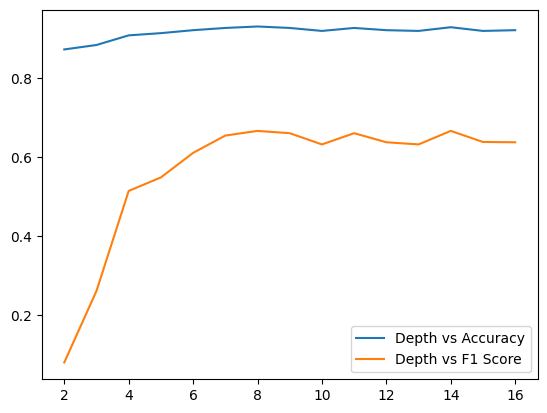

In [21]:
# Use steps from above to recreate original dataset without oversampling
df = pd.read_csv('churn-bigml-80.csv')
df=df.drop(['State' ,'International plan','Voice mail plan'], axis=1)
df['Churn'] = df['Churn'].map(lambda e : "Yes" if e else "No")
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Again we will track depth, accuracy, and f1 score for all our random forest classifiers
depths = [0] * 15
accs = [0] * 15
f1s = [0] * 15
# Train forests of every height between 2 and 16 inclusive
for i in range(2, 17):
    rf = RandomForestClassifier(max_depth = i)
    rf.fit(X_train, y_train)
    # see predicted values from test data
    predicted = rf.predict(X_test)
    # store the accuracy score of this tree
    acc = rf.score(X_test, y_test)
    # store the f1 score of this tree
    f1 = f1_score(y_test, predicted, average = 'binary', pos_label= "Yes")
    depths[i - 2] = i
    accs[i -2] = acc
    f1s[i - 2] = f1

plt.plot(depths, accs, label = "Depth vs Accuracy")
plt.plot(depths, f1s, label = "Depth vs F1 Score")
plt.legend()
plt.show()

Once again we see that the imbalanced class distribution leads to a very poor f1 score.

#### Naive Bayes Implementation

Lets see how our predictive model does if we try a Naive Bayes approach. The Naive Bayes is a powerful application of Bayes' rule. Bayes' rule is used to calculate the conditional probability of a certain outcome based on the state of one or more variables. If we were to calculate the conditional probability of the label using the state of all our features using Bayes' rule, we're left with a simple and effective classifier. However, by using the standard Bayes' rule with a large number of features, the calculations become mathematically and computationally challenging. By making the critical assumption that the conditional probability of the label given any feature is independant of each other feature, we get a much simpler equation: $$P(y|x_1,...,x_n)\propto P(y)\prod_{i=1}^{n}P(x_i|y)$$
For more information, check this link: https://scikit-learn.org/stable/modules/naive_bayes.html

In [22]:
df = pd.read_csv('churn-bigml-80.csv')
df=df.drop(['State' ,'International plan','Voice mail plan'], axis=1)

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8670411985018727


We can see that the accuracy is similar to the simple model which only predicts "False". This bias comes from the fact that 86% of the labels in the data are false. For a more realistic view of the accuracy of the model, we look at the various sampling techniques seen above: RandomUnderSampler, RandomOverSampler, SMOTE, and ADASYN.

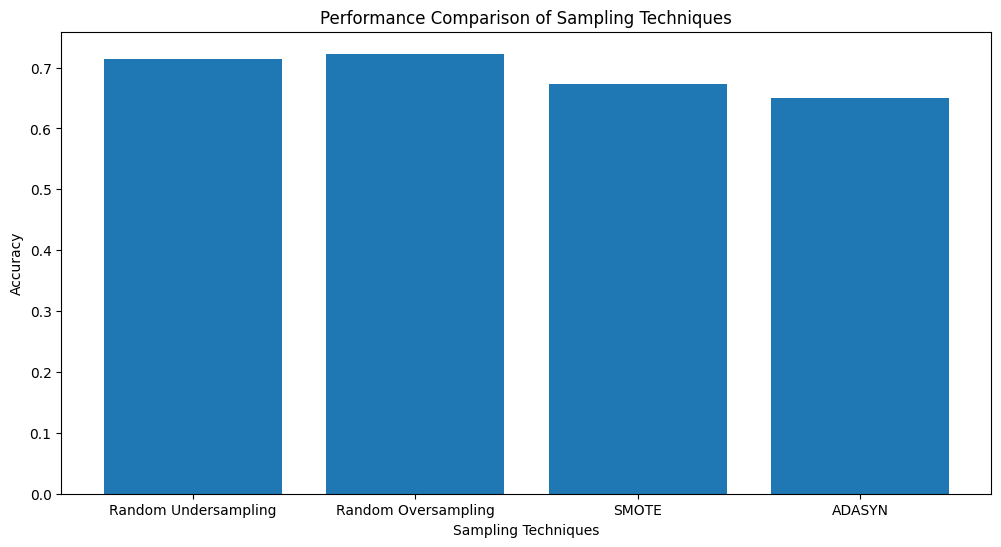

In [24]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

sample_types = ["Random Undersampling", "Random Oversampling", "SMOTE", "ADASYN"]

X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=260)

# Random Undersampling
undersample = RandomUnderSampler(random_state = 260)

X_train_sample, y_train_sample = undersample.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
undersample_accuracy = accuracy_score(y_test, y_pred)


# Random Oversampling
oversample = RandomOverSampler(random_state = 260)

X_train_sample, y_train_sample = oversample.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
oversample_accuracy = accuracy_score(y_test, y_pred)


# SMOTE sampling
smote = SMOTE(random_state = 260)

X_train_sample, y_train_sample = smote.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
smote_accuracy = accuracy_score(y_test, y_pred)


# ADASYN sampling
adasyn = ADASYN(random_state = 260)

X_train_sample, y_train_sample = adasyn.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
adasyn_accuracy = accuracy_score(y_test, y_pred)


accuracies = [undersample_accuracy, oversample_accuracy, smote_accuracy, adasyn_accuracy]
plt.figure(figsize=(12, 6))
plt.bar(sample_types, accuracies)
plt.xlabel('Sampling Techniques')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Sampling Techniques')
plt.show()

It looks as if Random Oversampling and Random Undersampling perform comparatively the best, but still don't do very well. One aspect of the data which we can improve for Naive Bayes is the elimination of correlated features. The key assumption of Naive Bayes is feature independence. The inclusion of features which are highly related can degrade the performance of the Naive Bayes classifier.

**Correlated Features**

<Axes: >

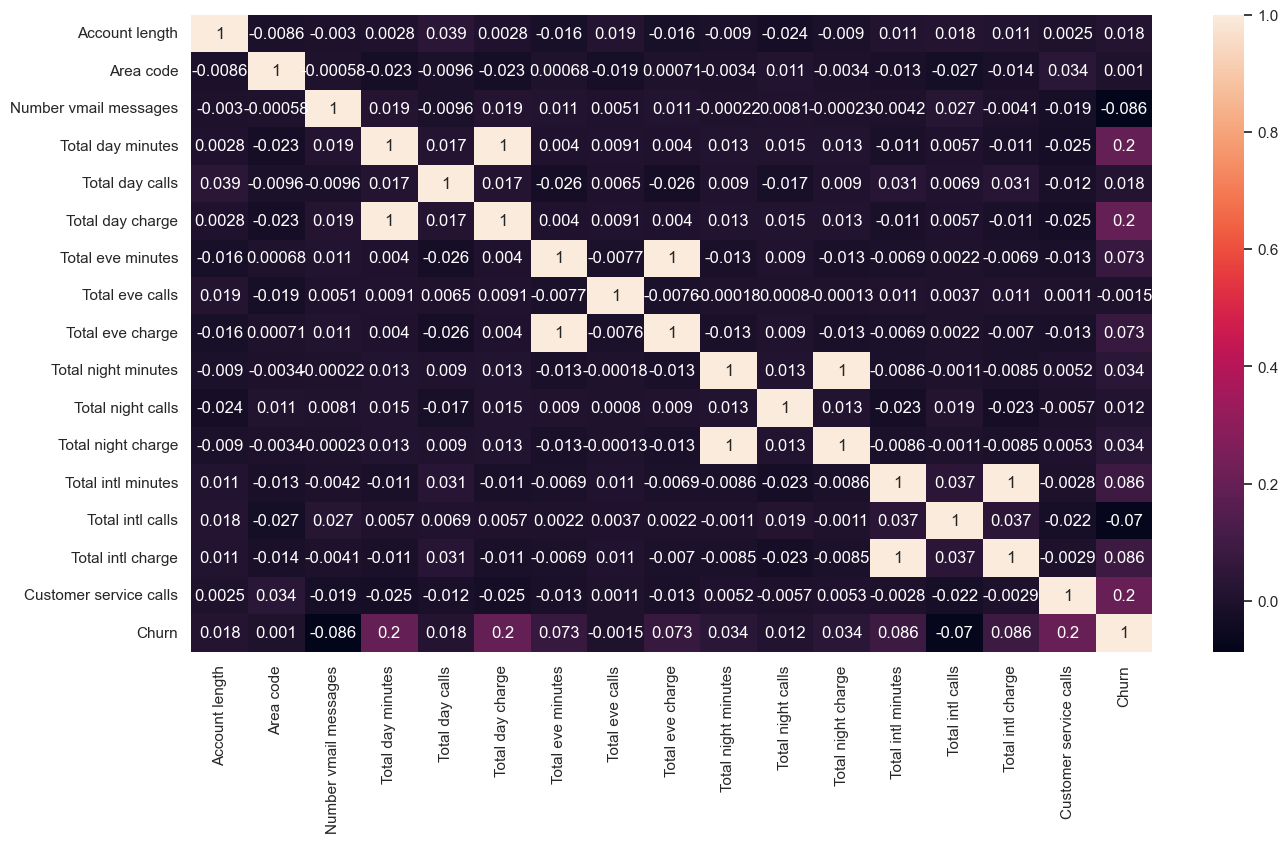

In [25]:
sns.set(rc={'figure.figsize':(15.5,8.27)})

# Generate correlation heatmap for the data to detect dependent features
correlations = df.corr()
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)

We can see here that the day/evening/night/international charges and minutes are a direct function of each other-- HIGHLY correlated. It should improve the performance of the model to eliminate one of them. In this case, we will eliminate the "charge" features.

In [26]:
# Lets drop features which are highly correlated with another feature (day/evening/night/international charge): 
df_trimmed = df

df_trimmed = df_trimmed.drop('Total day charge', axis = 1)
df_trimmed = df_trimmed.drop('Total eve charge', axis = 1)
df_trimmed = df_trimmed.drop('Total night charge', axis = 1)
df_trimmed = df_trimmed.drop('Total intl charge', axis = 1)


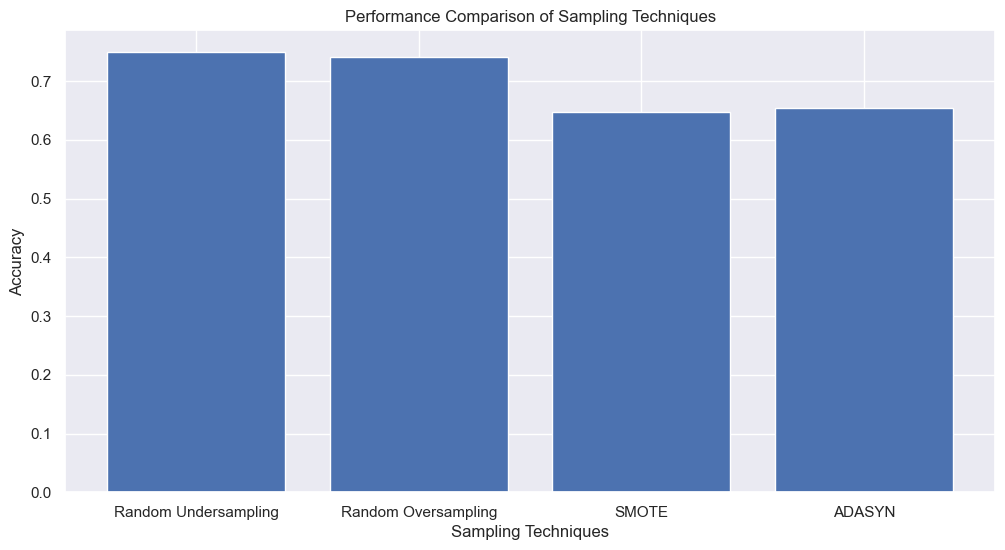

In [27]:
X = df_trimmed.drop('Churn', axis = 1)
y = df_trimmed['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=260)

# Random Undersampling
undersample = RandomUnderSampler(random_state = 260)

X_train_sample, y_train_sample = undersample.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
undersample_accuracy = accuracy_score(y_test, y_pred)


# Random Oversampling
oversample = RandomOverSampler(random_state = 260)

X_train_sample, y_train_sample = oversample.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
oversample_accuracy = accuracy_score(y_test, y_pred)


# SMOTE sampling
smote = SMOTE(random_state = 260)

X_train_sample, y_train_sample = smote.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
smote_accuracy = accuracy_score(y_test, y_pred)


# ADASYN sampling
adasyn = ADASYN(random_state = 260)

X_train_sample, y_train_sample = adasyn.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
adasyn_accuracy = accuracy_score(y_test, y_pred)


accuracies = [undersample_accuracy, oversample_accuracy, smote_accuracy, adasyn_accuracy]
plt.figure(figsize=(12, 6))
plt.bar(sample_types, accuracies)
plt.xlabel('Sampling Techniques')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Sampling Techniques')
plt.show()

The random undersampling and random oversampling accuracy improve slightly when correlated features are removed. Lets see if we can further improve.


**Gaussian Distribution and KDE**

Another strategy we can employ is detecting if there is any non-normally distributed data in the dataset. Gaussian Naive Bayes assumes that the mean and variance for each continuous feature describes the distribution of the data. When that isn't the case, we can utilize the Kernel Density Estimation of non-normal feature distributions to generate the probability density function of the distrobution, which helps better capture the shape and charactaristics of the feature.

Account length: Not normally distributed (p-value = 0.0089)


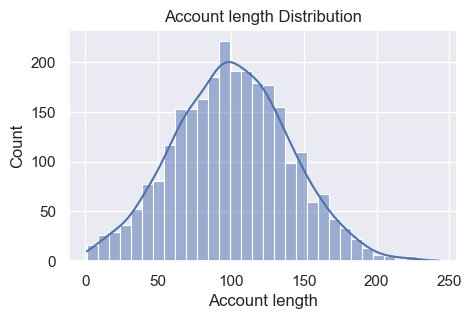

Area code: Not normally distributed (p-value = 0.0000)


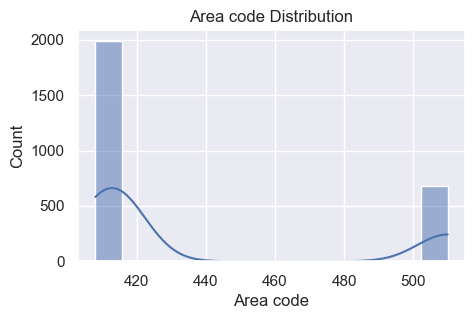

Number vmail messages: Not normally distributed (p-value = 0.0000)


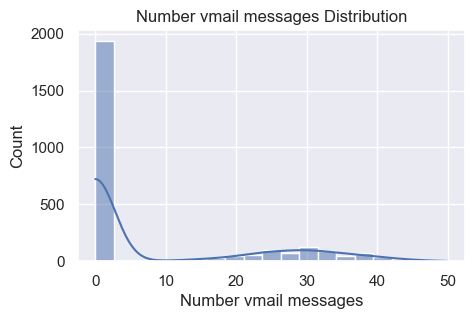

Total day minutes: Normally distributed (p-value = 0.5569)


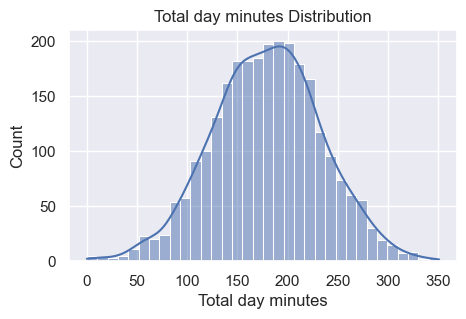

Total day calls: Not normally distributed (p-value = 0.0001)


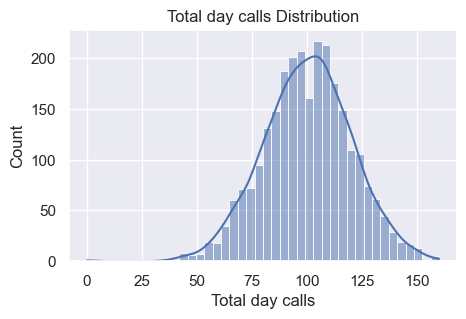

Total eve minutes: Normally distributed (p-value = 0.7344)


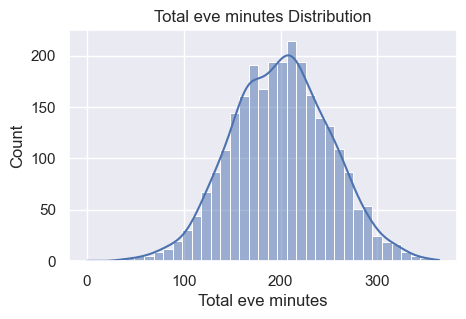

Total eve calls: Not normally distributed (p-value = 0.0079)


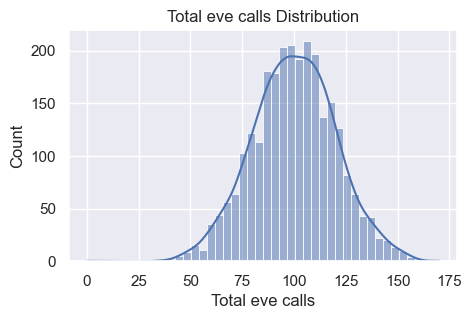

Total night minutes: Normally distributed (p-value = 0.4750)


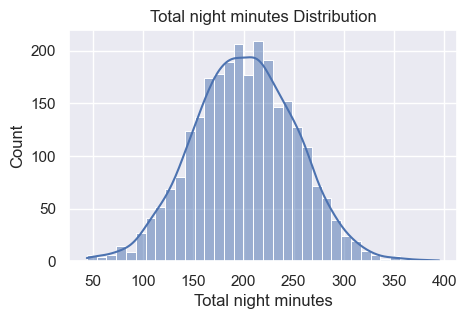

Total night calls: Normally distributed (p-value = 0.1843)


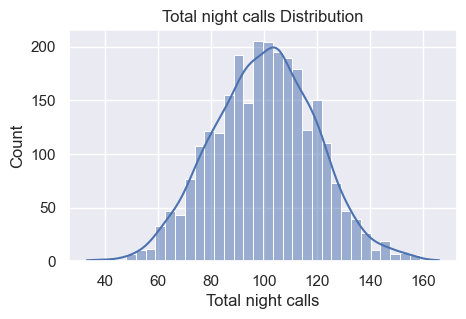

Total intl minutes: Not normally distributed (p-value = 0.0000)


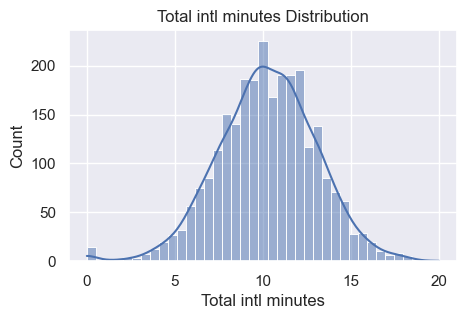

Total intl calls: Not normally distributed (p-value = 0.0000)


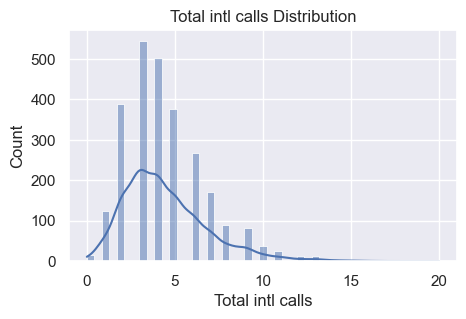

Customer service calls: Not normally distributed (p-value = 0.0000)


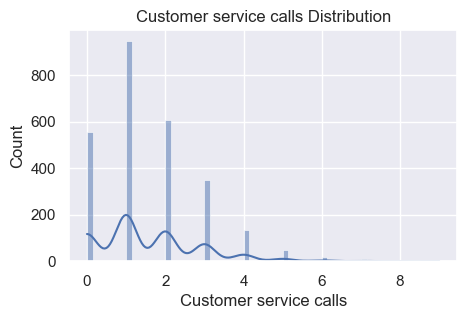

In [28]:
from scipy import stats

sns.set(rc={'figure.figsize':(5,3)})

df_features = df_trimmed.drop('Churn', axis = 1)

for feature in df_features.columns:
    stat, p = stats.shapiro(df_features[feature])
    alpha = 0.05

    if p > alpha:
        print(f"{feature}: Normally distributed (p-value = {p:.4f})")
    else:
        print(f"{feature}: Not normally distributed (p-value = {p:.4f})")
    
    sns.histplot(df_trimmed[feature], kde=True)
    plt.title(f"{feature} Distribution")
    plt.show()

Among the non-normal distrobutions are the features: "Number of vmail messages", "Total day calls", "Total eve calls", "Total intl minutes", and "Total intl calls". Lets create a new dataset which uses the KDE for each of those features, instead of the raw data.

In [29]:
from scipy.stats import gaussian_kde

df_trimmed_kde = df_trimmed

values = df_trimmed['Number vmail messages']
kde = gaussian_kde(values)
kde_vals = kde(values)
df_trimmed_kde['Number_vmail_messages_kde'] = kde_vals
df_trimmed_kde = df_trimmed_kde.drop('Number vmail messages', axis = 1)

values = df_trimmed['Total day calls']
kde = gaussian_kde(values)
kde_vals = kde(values)
df_trimmed_kde['Total_day_calls_kde'] = kde_vals
df_trimmed_kde = df_trimmed_kde.drop('Total day calls', axis = 1)

values = df_trimmed['Total eve calls']
kde = gaussian_kde(values)
kde_vals = kde(values)
df_trimmed_kde['Total_eve_calls_kde'] = kde_vals
df_trimmed_kde = df_trimmed_kde.drop('Total eve calls', axis = 1)

values = df_trimmed['Total intl minutes']
kde = gaussian_kde(values)
kde_vals = kde(values)
df_trimmed_kde['Total_intl_minutes_kde'] = kde_vals
df_trimmed_kde = df_trimmed_kde.drop('Total intl minutes', axis = 1)

values = df_trimmed['Total intl calls']
kde = gaussian_kde(values)
kde_vals = kde(values)
df_trimmed_kde['Total_intl_calls_kde'] = kde_vals
df_trimmed_kde = df_trimmed_kde.drop('Total intl calls', axis = 1)

df_trimmed_kde.head()

,Account length,Area code,Total day minutes,Total eve minutes,Total night minutes,Total night calls,Customer service calls,Churn,Number_vmail_messages_kde,Total_day_calls_kde,Total_eve_calls_kde,Total_intl_minutes_kde,Total_intl_calls_kde
0,128,415,265.1,197.4,244.7,91,1,False,0.012057,0.018175,0.018904,0.145613,0.198210
1,107,415,161.6,195.5,254.4,103,1,False,0.012745,0.010566,0.018829,0.068359,0.198210
2,137,415,243.4,121.2,162.6,104,0,False,0.102947,0.015933,0.017963,0.113512,0.143552
3,84,408,299.4,61.9,196.9,89,2,False,0.102947,0.006715,0.016567,0.059888,0.065885
4,75,415,166.7,148.3,186.9,121,3,False,0.102947,0.016500,0.010947,0.145432,0.198210


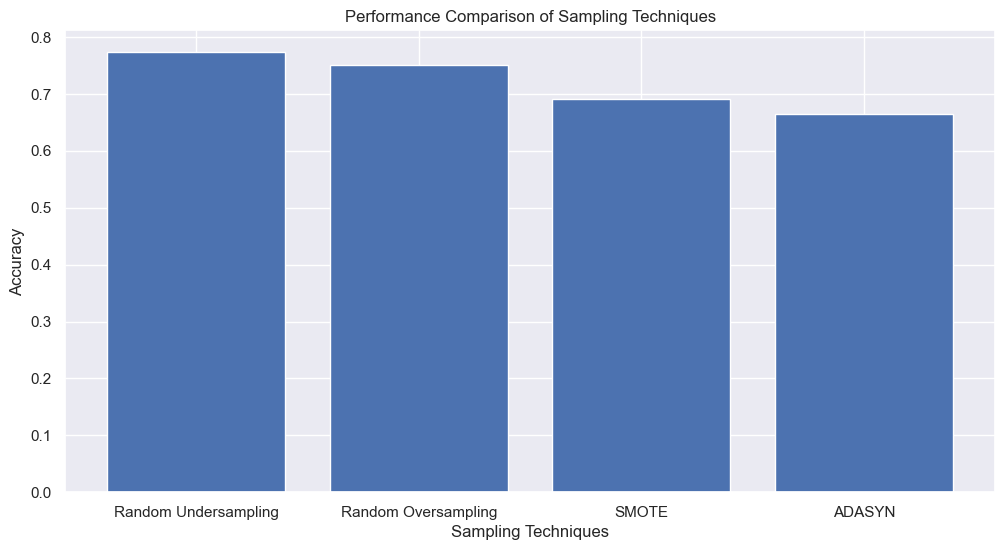

In [30]:
X = df_trimmed_kde.drop('Churn', axis = 1)
y = df_trimmed_kde['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=260)

# Random Undersampling
undersample = RandomUnderSampler(random_state = 260)

X_train_sample, y_train_sample = undersample.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
undersample_accuracy = accuracy_score(y_test, y_pred)


# Random Oversampling
oversample = RandomOverSampler(random_state = 260)

X_train_sample, y_train_sample = oversample.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
oversample_accuracy = accuracy_score(y_test, y_pred)


# SMOTE sampling
smote = SMOTE(random_state = 260)

X_train_sample, y_train_sample = smote.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
smote_accuracy = accuracy_score(y_test, y_pred)


# ADASYN sampling
adasyn = ADASYN(random_state = 260)

X_train_sample, y_train_sample = adasyn.fit_resample(X_train, y_train)
nb.fit(X_train_sample, y_train_sample)

y_pred = nb.predict(X_test)
adasyn_accuracy = accuracy_score(y_test, y_pred)


accuracies = [undersample_accuracy, oversample_accuracy, smote_accuracy, adasyn_accuracy]
plt.figure(figsize=(12, 6))
plt.bar(sample_types, accuracies)
plt.xlabel('Sampling Techniques')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Sampling Techniques')
plt.show()

Again, we see a small improvement in the random undersampling performance. Even after accounting for imbalanced classes, non-independence/correlation between features, and non-Gaussian distrobution of continuous data, Naive Bayes seems to not be the best classifier for this data. It is possible that the relationship between features, and how that translates to label class, is complex. Naive Bayes assumes a simple relationship between features, however KNN and Decision Trees/Random Forest are, in contrast, much better at detecting complex feature relationships. This could explain why Naive Bayes performance on this dataset is poor, while KNN and Decision Trees does relatively well.